Define values for Data Points

In [1249]:
!pip install numpy
!pip install pandas 
!pip install matplotlib

In [1250]:
import numpy as np
import pandas as pd
import random

In [1251]:
# class RBF_nn(self,train_data,sigma):
    
#     # Returns list of values that x1,x2 can take
#     def value_gen(self,max_val):
#         i_list = np.linspace(0, 20, num = (max_val+1),dtype=int)
#         print("Range of i and j is : ",i_list) # Gives the range of i,j
#         values_list=list(map(value_func,i_list))
#         print("List of values",values_list)
#         return values_list
    
#     #Here i=0,1,2...20, returns float
#     def value_func(self,i):
#         return round(-2+0.2*i,2)
    
#     def random_train_samples(self,value_list):
#         train_data = []
#         for num_samples in range(441):
#             row = []  
#             for num_features in range(2):
#                 row.append(random.choice(value_list))
#             train_data.append(row) 
#         train_data=np.array(train_data)
#         return train_data
    
    


    


    

In [1252]:
#Here i=0,1,2...20, returns float
def value_func(i):
    return round(-2+0.2*i,2)

# Returns list of values that x1,x2 can take
def value_gen(max_val):
    i_list = np.linspace(0, 20, num = 21,dtype=int)
    print("Range of i and j is : ",i_list) # Gives the range of i,j
    values_list=list(map(value_func,i_list))
    print("List of values",values_list)
    return values_list



In [1253]:
values_list=value_gen(20)

Range of i and j is :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
List of values [-2.0, -1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]


In [1254]:
#Returns a 441x2 np_array which is the training data. 441 samples with 2 input features each

def random_train_samples(value_list):
    train_data = []
    for num_samples in range(441):
        row = []  
        for num_features in range(2):
            row.append(random.choice(value_list))
        train_data.append(row) 
    train_data=np.array(train_data)
    return train_data


# # Checking for sequential data
# import itertools
# def sequential_train_samples(value_list):
#     permutations = list(itertools.product(value_list, repeat=2))
#     train_data = np.array(permutations)
#     return train_data



In [1255]:
#Save train_data
train_data=random_train_samples(values_list)
# train_data=sequential_train_samples(values_list)

In [1256]:
print("Shape of Train data is :",train_data.shape)


Shape of Train data is : (441, 2)


In [1257]:
# Visualise Train Data
TrainData_df=pd.DataFrame(train_data,columns=['x1','x2'])
TrainData_df

,x1,x2
0,1.6,-0.2
1,-0.8,0.6
2,-0.2,0.0
3,1.0,-1.6
4,2.0,0.0
...,...,...
436,-0.8,1.2
437,0.6,1.8
438,0.0,-1.0
439,-0.8,-0.2


In [1258]:
# train_pt is a 1x2 np array, returns int
def squared_sum(train_pt):
    return (train_pt[0]**2)+(train_pt[1]**2)
            
        


In [1259]:
# Returns a 441x1 np array containing the output labels as per f(x1,x2)

def train_labels(train_data):
    labels=[]       #Output Labels
    square_sum=[]   # To evaluate (x1^2 + x2^2) , returns (441,1)
    for i in range(train_data.shape[0]):
        square_sum.append(squared_sum(train_data[i]))
        if squared_sum(train_data[i])<=1:
            labels.append(1)
        else:
            labels.append(-1)
    labels=np.array(labels)
    labels=np.reshape(labels,(441,1))
    square_sum=np.array(square_sum)
    square_sum=np.reshape(square_sum,(441,1))
    return labels,square_sum

op_labels,squared_op=train_labels(train_data)
        

In [1260]:
op_labels

array([[-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],

In [1261]:
# Function to create a dataframe to crosscheck function outputs

def create_df(np_array,op_labels,squared_op):
    columns=['x1','x2']
    df=pd.DataFrame(np_array,columns=columns)
    df['Squares']=squared_op
    df['Output']=op_labels
    return df
    
df=create_df(train_data,op_labels,squared_op)

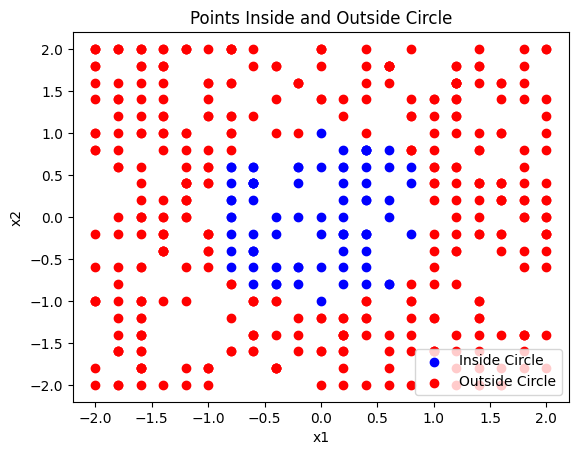

In [1262]:
import matplotlib.pyplot as plt

# # Example data
# data = np.random.randn(441, 2)  # Replace with your actual data
# labels = np.random.randint(0, 2, size=(441, 1))  # Replace with your actual labels

# Separate the points based on labels
inside_circle = train_data[op_labels.flatten() == 1]
outside_circle = train_data[op_labels.flatten() == -1]
# Plotting
plt.scatter(inside_circle[:, 0], inside_circle[:, 1], color='blue', label='Inside Circle')
plt.scatter(outside_circle[:, 0], outside_circle[:, 1], color='red', label='Outside Circle')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points Inside and Outside Circle')
plt.legend()
plt.show()


In [1263]:
#returns rbf centres-441x2 matrix

def centres(train_data):
    return train_data


rbf_centres=centres(train_data)
print(rbf_centres)
    

[[ 1.6 -0.2]
 [-0.8  0.6]
 [-0.2  0. ]
 [ 1.  -1.6]
 [ 2.   0. ]
 [ 1.8  1.6]
 [-0.6 -1. ]
 [-0.4  1.4]
 [-0.2  1.6]
 [ 0.2 -0.2]
 [-1.2  0.2]
 [-0.6 -0.2]
 [-0.6 -1.4]
 [-2.  -2. ]
 [-0.8  2. ]
 [-2.   1.8]
 [ 1.6 -1.8]
 [-1.   2. ]
 [-0.6  0.4]
 [ 1.   0.4]
 [ 0.4 -0.8]
 [ 1.4  0.4]
 [ 0.   1. ]
 [-1.  -0.2]
 [-0.2 -0.6]
 [ 1.2  1.8]
 [ 0.2  0.6]
 [-1.8  0.8]
 [ 0.4  0.6]
 [-2.   0.8]
 [-1.  -0.4]
 [ 2.   2. ]
 [ 1.8  0.2]
 [ 1.8  0. ]
 [-2.   1. ]
 [ 0.2 -0.2]
 [-1.2  0.4]
 [-1.6 -1.2]
 [ 1.4  0. ]
 [-1.6 -1.6]
 [-0.2  1. ]
 [ 1.   1.4]
 [-2.   2. ]
 [-1.4  1. ]
 [-0.8 -1.6]
 [-0.6  0.4]
 [-1.8 -0.2]
 [-1.8  0.6]
 [-1.8  1.4]
 [-0.8  1.2]
 [ 0.4  2. ]
 [-2.  -1. ]
 [-1.8 -1. ]
 [-1.8  1.6]
 [-1.8  2. ]
 [-0.4  1.8]
 [-1.  -0.4]
 [-1.8 -1.6]
 [ 1.2  1.6]
 [-1.4  1.2]
 [-0.4  1. ]
 [-0.8 -1.6]
 [-1.4  1.8]
 [ 1.2  1.6]
 [-1.   1.6]
 [-1.4  2. ]
 [ 0.8  0.8]
 [-1.2 -0.6]
 [ 0.2  0.4]
 [-1.4  1. ]
 [-0.4 -1.8]
 [ 1.   1.2]
 [ 0.6 -2. ]
 [ 1.8 -0.6]
 [ 0.8 -0.8]
 [-0.8  1.6]
 [ 0.2 -0.6]

In [1264]:

def gaussian_kernel(ip_array, center_vector, sigma):
#     print(ip_array - center_vector)
    x=np.exp(-np.linalg.norm(ip_array - center_vector)**2 / (2 * sigma**2))
#     print(np.array(x).shape)
    return x
#     n, m  = ip_array.shape[0], center_vector.shape[0]

#     val_1 = -2 * np.outer(ip_array, center_vector)

#     val_2 = np.broadcast_to(np.power(ip_array, 2), (m, n)).T
#     val_3 = np.broadcast_to(np.power(center_vector, 2), (n,m))

#     K = val_1 + val_2 + val_3

#     K  = np.exp(np.multiply(-1/(2 * sigma*sigma), K))


def rbf(train_data,centres,sigma):
    phi = np.zeros((train_data.shape[0], centres.shape[0]))
    
    for i in range(train_data.shape[0]):
        for j in range(centres.shape[0]):
            phi[i, j] = gaussian_kernel(train_data[i], centres[j], sigma)
    return phi

# arr=gaussian_kernel(train_data,rbf_centres[0],0.1)
rbf_output=rbf(train_data,rbf_centres,1)


In [1265]:
def weights(rbf_output,op_labels):
    G_pinv=np.linalg.pinv(rbf_output)
    print(G_pinv.shape)
    D=op_labels
    print(D.shape)
    W=np.dot(G_pinv,D)
    print(W.shape)
    return W

W=weights(rbf_output,op_labels)

(441, 441)
(441, 1)
(441, 1)


In [1266]:
def predict(W,G):
#     Y=np.dot(W.T,G)
    Y=np.dot(G,W)
    Y=np.array(Y)
    Y=np.sign(Y)
    return Y

Y=predict(W,rbf_output)
Y.shape

    
    

(441, 1)

In [1267]:
# Calculate accuracy
accuracy = np.mean(Y == op_labels) * 100
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 100.00%


In [1268]:
def calculate_mse(predictions, actual_labels):
    return np.mean((predictions - actual_labels) ** 2)*100
calculate_mse(Y,op_labels)

0.0

In [1269]:
# df_2=pd.DataFrame(train_data-rbf_centres[0],columns=['xi1-ti1','xi2-ti2'])
arr=gaussian_kernel(train_data,rbf_centres[0],0.1)
# print(arr)
# df_2=pd.DataFrame(arr,columns=['xi1-ti1','xi2-ti2'])
print(rbf_centres[0])
# # print(df)
# print(df_2)


[ 1.6 -0.2]


In [1270]:
a1=np.array([[1,2],[2,3],[4,5]])
a2=np.array([[2,3]])
print(a1-a2)

[[-1 -1]
 [ 0  0]
 [ 2  2]]


In [1271]:
print(rbf_output.shape)

(441, 441)


In [1272]:
for index, element in np.ndenumerate(rbf_output):
    print("Index:", index, "Element:", element)

Index: (0, 0) Element: 1.0
Index: (0, 1) Element: 0.04076220397836617
Index: (0, 2) Element: 0.19398004229089183
Index: (0, 3) Element: 0.31348618088260527
Index: (0, 4) Element: 0.9048374180359596
Index: (0, 5) Element: 0.19398004229089183
Index: (0, 6) Element: 0.0645703468931685
Index: (0, 7) Element: 0.0376282568071762
Index: (0, 8) Element: 0.03916389509898708
Index: (0, 9) Element: 0.37531109885139946
Index: (0, 10) Element: 0.018315638888734196
Index: (0, 11) Element: 0.0889216174593863
Index: (0, 12) Element: 0.043282797901965854
Index: (0, 13) Element: 0.0003035391380788657
Index: (0, 14) Element: 0.004991593906910213
Index: (0, 15) Element: 0.0002075787027177179
Index: (0, 16) Element: 0.2780373004531941
Index: (0, 17) Element: 0.0030275547453758127
Index: (0, 18) Element: 0.07427357821433384
Index: (0, 19) Element: 0.697676326071031
Index: (0, 20) Element: 0.40656965974059894
Index: (0, 21) Element: 0.8187307530779818
Index: (0, 22) Element: 0.1353352832366127
Index: (0, 23)

Index: (41, 401) Element: 0.9048374180359595
Index: (41, 402) Element: 0.016572675401761255
Index: (41, 403) Element: 0.9607894391523232
Index: (41, 404) Element: 0.020650825181712573
Index: (41, 405) Element: 0.05502322005640721
Index: (41, 406) Element: 0.021067999523041423
Index: (41, 407) Element: 0.04688769521998851
Index: (41, 408) Element: 6.128349505322202e-05
Index: (41, 409) Element: 0.00257991197202718
Index: (41, 410) Element: 0.8187307530779818
Index: (41, 411) Element: 0.0889216174593863
Index: (41, 412) Element: 0.053933687300356
Index: (41, 413) Element: 0.5066169923655897
Index: (41, 414) Element: 0.02732372244729256
Index: (41, 415) Element: 0.47711391552103444
Index: (41, 416) Element: 0.256660776953556
Index: (41, 417) Element: 0.014407591843112376
Index: (41, 418) Element: 0.0008087667511241107
Index: (41, 419) Element: 0.16529888822158664
Index: (41, 420) Element: 0.018315638888734196
Index: (41, 421) Element: 0.010254896296404022
Index: (41, 422) Element: 0.02065

Index: (58, 219) Element: 0.35345468195878005
Index: (58, 220) Element: 0.0194482147453854
Index: (58, 221) Element: 0.004607821929992752
Index: (58, 222) Element: 0.021067999523041423
Index: (58, 223) Element: 0.44932896411722156
Index: (58, 224) Element: 0.019841094744370298
Index: (58, 225) Element: 0.05613476283413368
Index: (58, 226) Element: 0.0026852001769538205
Index: (58, 227) Element: 0.031429762018367724
Index: (58, 228) Element: 0.0030275547453758127
Index: (58, 229) Element: 0.004991593906910213
Index: (58, 230) Element: 0.0194482147453854
Index: (58, 231) Element: 0.009657697627537777
Index: (58, 232) Element: 0.006737946999085461
Index: (58, 233) Element: 0.01759747241562341
Index: (58, 234) Element: 0.22763768838381274
Index: (58, 235) Element: 0.007907054051593441
Index: (58, 236) Element: 0.0194482147453854
Index: (58, 237) Element: 0.23223627472975872
Index: (58, 238) Element: 0.0009878299405312295
Index: (58, 239) Element: 0.010254896296404022
Index: (58, 240) Eleme

Index: (61, 415) Element: 0.02678267649263816
Index: (61, 416) Element: 0.03337326996032608
Index: (61, 417) Element: 0.5945205479701944
Index: (61, 418) Element: 0.9607894391523232
Index: (61, 419) Element: 0.23692775868212165
Index: (61, 420) Element: 0.3678794411714424
Index: (61, 421) Element: 0.37531109885139957
Index: (61, 422) Element: 0.09827358560436146
Index: (61, 423) Element: 0.29523016692401416
Index: (61, 424) Element: 0.03337326996032608
Index: (61, 425) Element: 0.005516564420760777
Index: (61, 426) Element: 0.44043165450599925
Index: (61, 427) Element: 0.08208499862389876
Index: (61, 428) Element: 0.5598983665654019
Index: (61, 429) Element: 0.0194482147453854
Index: (61, 430) Element: 0.835270211411272
Index: (61, 431) Element: 0.0889216174593863
Index: (61, 432) Element: 0.0011592291739045903
Index: (61, 433) Element: 0.012034232284723775
Index: (61, 434) Element: 0.0011137751478448024
Index: (61, 435) Element: 0.2780373004531941
Index: (61, 436) Element: 0.019841094

Index: (64, 333) Element: 0.0041693296979041115
Index: (64, 334) Element: 0.6703200460356393
Index: (64, 335) Element: 0.7117703227626097
Index: (64, 336) Element: 0.007446583070924338
Index: (64, 337) Element: 0.004991593906910213
Index: (64, 338) Element: 0.007446583070924338
Index: (64, 339) Element: 0.009279013887064744
Index: (64, 340) Element: 0.1826835240527346
Index: (64, 341) Element: 0.8187307530779818
Index: (64, 342) Element: 0.010254896296404022
Index: (64, 343) Element: 0.3678794411714424
Index: (64, 344) Element: 0.017597472415623375
Index: (64, 345) Element: 0.02843882471418448
Index: (64, 346) Element: 0.1826835240527346
Index: (64, 347) Element: 0.005516564420760766
Index: (64, 348) Element: 0.14370394977770293
Index: (64, 349) Element: 0.005516564420760766
Index: (64, 350) Element: 0.01277838764953576
Index: (64, 351) Element: 0.004607821929992748
Index: (64, 352) Element: 0.25666077695355577
Index: (64, 353) Element: 0.9231163463866358
Index: (64, 354) Element: 0.04

Index: (99, 176) Element: 0.065874754426403
Index: (99, 177) Element: 0.5945205479701944
Index: (99, 178) Element: 0.5945205479701945
Index: (99, 179) Element: 0.003926526838305628
Index: (99, 180) Element: 1.8458233995780558e-05
Index: (99, 181) Element: 0.002851243682679635
Index: (99, 182) Element: 0.6065306597126334
Index: (99, 183) Element: 0.0004180121746110129
Index: (99, 184) Element: 0.0011592291739045914
Index: (99, 185) Element: 0.065874754426403
Index: (99, 186) Element: 0.0006112527611295734
Index: (99, 187) Element: 0.9801986733067554
Index: (99, 188) Element: 2.982987947026762e-05
Index: (99, 189) Element: 0.020650825181712545
Index: (99, 190) Element: 0.16529888822158656
Index: (99, 191) Element: 0.0022428677194858034
Index: (99, 192) Element: 0.003926526838305628
Index: (99, 193) Element: 0.004991593906910213
Index: (99, 194) Element: 0.19398004229089183
Index: (99, 195) Element: 0.0002075787027177179
Index: (99, 196) Element: 0.014407591843112376
Index: (99, 197) Elem

Index: (117, 118) Element: 0.1826835240527346
Index: (117, 119) Element: 0.00020346836901064417
Index: (117, 120) Element: 0.0009878299405312295
Index: (117, 121) Element: 0.0028512436826796323
Index: (117, 122) Element: 0.1353352832366127
Index: (117, 123) Element: 0.20189651799465536
Index: (117, 124) Element: 0.0003936690406550786
Index: (117, 125) Element: 0.0507928338648985
Index: (117, 126) Element: 0.2780373004531941
Index: (117, 127) Element: 0.13265546508012177
Index: (117, 128) Element: 0.04076220397836621
Index: (117, 129) Element: 0.03404745473459933
Index: (117, 130) Element: 0.03142976201836768
Index: (117, 131) Element: 3.043248300840357e-05
Index: (117, 132) Element: 0.0019112457966326377
Index: (117, 133) Element: 0.0006112527611295734
Index: (117, 134) Element: 0.001533810679324463
Index: (117, 135) Element: 0.08208499862389876
Index: (117, 136) Element: 0.00011857083645433882
Index: (117, 137) Element: 0.0008087667511241107
Index: (117, 138) Element: 0.00806678713909

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1273]:
op_df=pd.DataFrame(op_labels,columns=['Actual'])
op_df['Predicted']=Y
op_df
op_df.to_csv('outputs.csv', index=True)

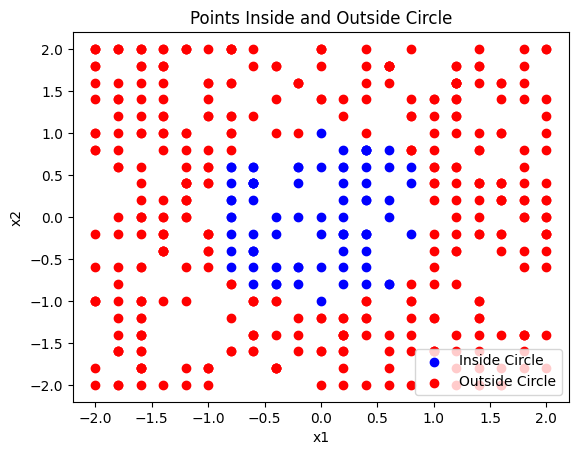

In [1274]:
inside_circle = train_data[Y.flatten() == 1.0]
outside_circle = train_data[Y.flatten() == -1.0]

# Plotting
plt.scatter(inside_circle[:, 0], inside_circle[:, 1], color='blue', label='Inside Circle')
plt.scatter(outside_circle[:, 0], outside_circle[:, 1], color='red', label='Outside Circle')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points Inside and Outside Circle')
plt.legend()
plt.show()


In [1275]:
(pd.DataFrame(rbf_output)).to_csv('rbf.csv',index=True)

# Randomly Sampled Centres (150)

In [1276]:
def rbf_centres_random(train_data):
    rbf_centres =np.empty((150,2))
    for num_samples in range(150):
        rbf_centres[num_samples]=random.choice(train_data)
    return rbf_centres
    
rbf_centres_random=rbf_centres_random(train_data)
# print(rbf_centres_random)

In [1277]:
rbf_output_random=rbf(train_data,rbf_centres_random,3)

In [1278]:
rbf_output_random.shape

(441, 150)

In [1279]:
W_random=weights(rbf_output_random,op_labels)

(150, 441)
(441, 1)
(150, 1)


In [1280]:
W_random.shape

(150, 1)

In [1281]:
Y_random=predict(W_random,rbf_output_random)
Y_random.shape


(441, 1)

In [1282]:
def plot(train_data,Y):
    inside_circle = train_data[Y.flatten() == 1.0]
    outside_circle = train_data[Y.flatten() == -1.0]

    # Plotting
    plt.scatter(inside_circle[:, 0], inside_circle[:, 1], color='blue', label='Inside Circle')
    plt.scatter(outside_circle[:, 0], outside_circle[:, 1], color='red', label='Outside Circle')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Points Inside and Outside Circle')
    plt.legend()
    plt.show()

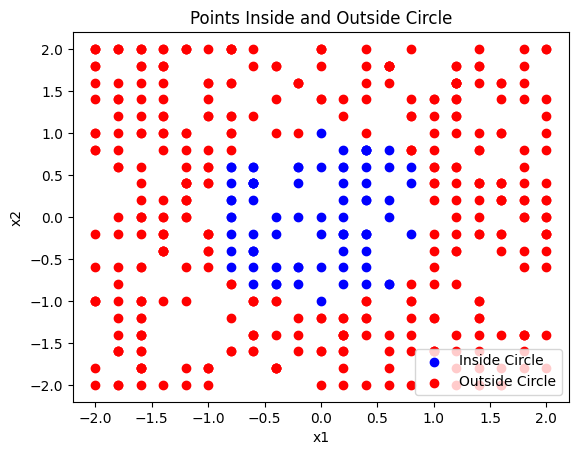

In [1283]:
plot(train_data,op_labels)

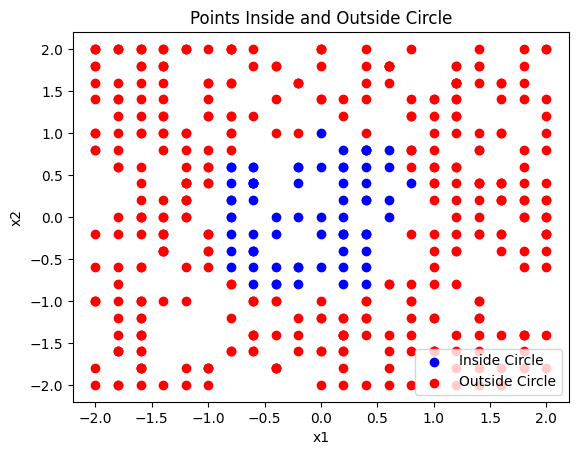

In [1284]:
plot(train_data,Y_random)

In [1285]:
accuracy = np.mean(Y_random == op_labels) * 100
print("Accuracy: {:.4f}%".format(accuracy))

Accuracy: 98.8662%
